In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df = pd.read_excel("trainingtestingset_latest.xlsx")
df.head()


,id,taxi_AB,bus_AB,bike_AB,taxi_BC,bus_BC,bike_BC,taxi_CD,bus_CD,bike_CD,traffic_AB,traffic_BC,traffic_CD
0,0,15,15,10,7,13,11,12,20,13,1,2,1
1,1,8,12,15,15,11,12,8,11,9,1,2,2
2,2,12,13,17,8,20,12,7,17,13,2,2,2
3,3,6,17,16,13,10,14,14,18,16,1,2,2
4,4,8,15,9,9,12,8,12,10,15,1,1,2


In [32]:
from itertools import product

def find_best_mode_combo(row):
    min_time = float('inf')
    best_combo = None
    for combo in product(['taxi', 'bus', 'bike'], repeat=3):
        total_time = (
            row[f'{combo[0]}_AB'] +
            row[f'{combo[1]}_BC'] +
            row[f'{combo[2]}_CD']
        )
        if total_time < min_time:
            min_time = total_time
            best_combo = combo
    return '->'.join(best_combo)

df['best_combo'] = df.apply(find_best_mode_combo, axis=1)


In [33]:
df[['mode_AB', 'mode_BC', 'mode_CD']] = df['best_combo'].str.split('->', expand=True)


In [34]:
features = [
    'taxi_AB', 'bus_AB', 'bike_AB',
    'taxi_BC', 'bus_BC', 'bike_BC',
    'taxi_CD', 'bus_CD', 'bike_CD',
    'traffic_AB', 'traffic_BC', 'traffic_CD'
]
X = df[features]
y_AB = df['mode_AB']
y_BC = df['mode_BC']
y_CD = df['mode_CD']


In [35]:
X_train, X_test, y_AB_train, y_AB_test = train_test_split(X, y_AB, train_size=75, random_state=42)
_, _, y_BC_train, y_BC_test = train_test_split(X, y_BC, train_size=75, random_state=42)
_, _, y_CD_train, y_CD_test = train_test_split(X, y_CD, train_size=75, random_state=42)


In [36]:
clf_AB = RandomForestClassifier(class_weight='balanced', random_state=42)
clf_BC = RandomForestClassifier(class_weight='balanced', random_state=42)
clf_CD = RandomForestClassifier(class_weight='balanced', random_state=42)


clf_AB.fit(X_train, y_AB_train)
clf_BC.fit(X_train, y_BC_train)
clf_CD.fit(X_train, y_CD_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [37]:
y_AB_pred = clf_AB.predict(X_test)
y_BC_pred = clf_BC.predict(X_test)
y_CD_pred = clf_CD.predict(X_test)

print("Accuracy AB:", accuracy_score(y_AB_test, y_AB_pred))
print("Accuracy BC:", accuracy_score(y_BC_test, y_BC_pred))
print("Accuracy CD:", accuracy_score(y_CD_test, y_CD_pred))


Accuracy AB: 0.96
Accuracy BC: 0.72
Accuracy CD: 0.92


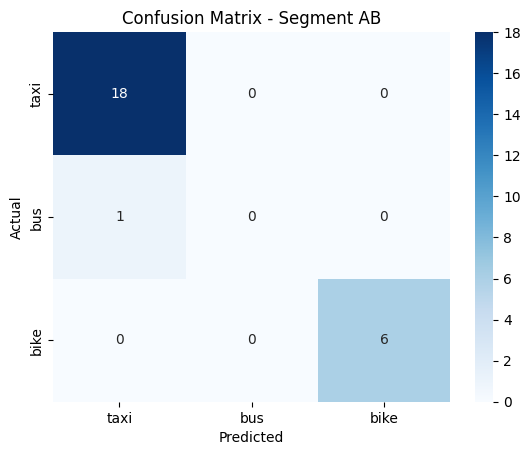

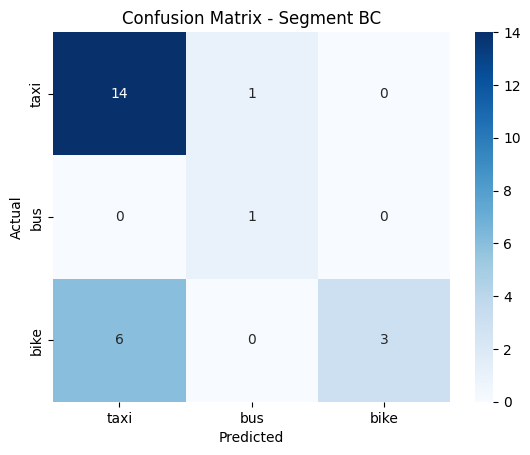

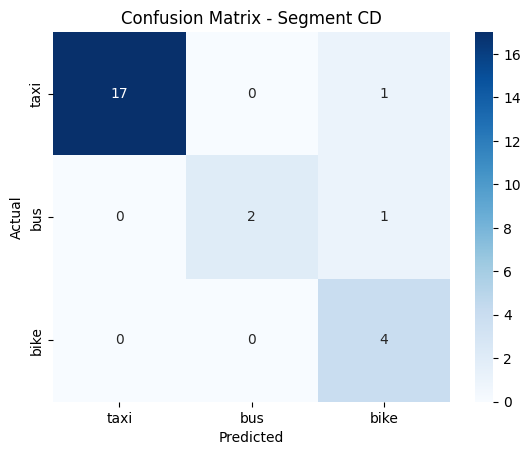

In [38]:
def plot_confusion(y_true, y_pred, segment):
    cm = confusion_matrix(y_true, y_pred, labels=['taxi', 'bus', 'bike'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['taxi', 'bus', 'bike'],
                yticklabels=['taxi', 'bus', 'bike'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - Segment {segment}")
    plt.show()

plot_confusion(y_AB_test, y_AB_pred, 'AB')
plot_confusion(y_BC_test, y_BC_pred, 'BC')
plot_confusion(y_CD_test, y_CD_pred, 'CD')
